<a href="https://colab.research.google.com/github/Fiona666-code/DataSci_Course/blob/main/Day%205/%5BDATA-05E%5D%20Example%20-%20Bay%20Wheels%20operations%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Bay Wheels operations data - Xuying Liu

## The data set

The data for the example come in two tables. The table `bay_stations` (a CSV file) contains data on 642 docking stations. These stations are not the same along the three-year period, since the organization is dynamic. The columns are:

* `station_id`, a unique identifier of the station. The first two characters indicate the location, with values 'BK' (Berkeley), 'SF' (San Francisco), 'SJ' (San Jose) and 'OK' (Oakland).

* `station_name`, the name of the station, referred to its location.

* `station_latitude`, the latitude of the station, with three decimals.

* `station_longitude`, the longitude of the station, with three decimals.

The table `bay_rides` (five zipped CSV files) contains information on all rides starting in the years 2021, 2022 and 2023, a total of 7,162,392 rides. The columns are:

* `user_type`, either 'casual' or 'member'.

* `bike_type`, either 'classic' or 'electric'.

* `start_time`, when the bike was picked, as yyyy-mm-dd hh:mm:ss.

* `start_station_id`, the identifier of the docking station where the ride started, missing when no station was involved.

* `end_time`, when the bike was returned, as yyyy-mm-dd hh:mm:ss.

* `end_station_id`, the identifier of the docking station where the ride ended, missing when no station was involved.

## Homework

1. Perform an analysis of the demand in which the patterns of variation for the demand of electric and classic bikes are compared. Are classic bikes lagging behind electric bikes?

2. Check that the information about the start and end stations is missing only for electric bikes. If you take this missingness as an indication of dockless bike sharing, you can examine how dockless sharing has evolved during these three years. Would you say that dockless sharing is trending up?

3. Which are the top-10 starting stations? Are they the same as the top-10 ending stations?

4. How frequent are circular rides, starting and ending at the same station?

5. Are there stations with very low activity, so you can consider dropping them?

6. Seasonal patterns can be different across the stations of the Bay Wheels network. How can you detect the stations where the between-month variation is highest?


## Importing the data

We import Pandas as usual.

In [ ]:
import pandas as pd

The table `rides` has been split in five data sets stored in zipped CSV files in GitHub, with a common path. So, we create a variable containing that path.

In [ ]:
path = 'https://raw.githubusercontent.com/MCanela-1954/Data/main/'

Next, we import the data from every files to a data frame.

In [ ]:
rides1 = pd.read_csv(path + 'bay_rides-1.csv.zip')
rides2 = pd.read_csv(path + 'bay_rides-2.csv.zip')
rides3 = pd.read_csv(path + 'bay_rides-3.csv.zip')
rides4 = pd.read_csv(path + 'bay_rides-4.csv.zip')
rides5 = pd.read_csv(path + 'bay_rides-5.csv.zip')

With the Pandas function `concat()`, we can get the **union** of these five data sets as a single data frame.

In [ ]:
rides = pd.concat([rides1, rides2, rides3, rides4, rides5])

## Exploring the data

We check the content of the data frame `rides` as in other examples, with the methods `.info()` and `.head()`. Everything is as expected. Note that the station ID is missing for some of the electric bikes, as explained in the introduction.

In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7162392 entries, 0 to 1162391
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_type         object
 1   bike_type         object
 2   start_time        object
 3   start_station_id  object
 4   end_time          object
 5   end_station_id    object
dtypes: object(6)
memory usage: 382.5+ MB


In [ ]:
rides.head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN


In [ ]:
rides['hour'] = rides['start_time'].str[:-6] + ':00:00'
rides.head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id,electric,classic,hour
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN,True,False,2021-01-01 00:00:00
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29,False,True,2021-01-01 00:00:00
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN,True,False,2021-01-01 00:00:00
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN,True,False,2021-01-01 00:00:00
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN,True,False,2021-01-01 00:00:00


In [ ]:
rides['hour'] = rides['hour'].astype('datetime64[ns]')
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7162392 entries, 0 to 1162391
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_type         object        
 1   bike_type         object        
 2   start_time        object        
 3   start_station_id  object        
 4   end_time          object        
 5   end_station_id    object        
 6   electric          bool          
 7   classic           bool          
 8   hour              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), object(6)
memory usage: 450.8+ MB


## Q1. Analyze Electric and Classic Bike Demand Patterns

In [ ]:
rides['electric'] = (rides['bike_type'] =='electric')
rides['classic'] = (rides['bike_type'] =='classic')
rides.head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id,electric,classic
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN,True,False
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29,False,True
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN,True,False
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN,True,False
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN,True,False


In [ ]:
df = rides[['hour', 'electric', 'classic']].groupby(by='hour').sum()
df.head()

,electric,classic
hour,,
2021-01-01 00:00:00,45,15
2021-01-01 01:00:00,63,12
2021-01-01 02:00:00,41,9
2021-01-01 03:00:00,22,3
2021-01-01 04:00:00,12,4


In [ ]:
df.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='hour', length=26277, freq=None)

In [ ]:
df.index.name = None

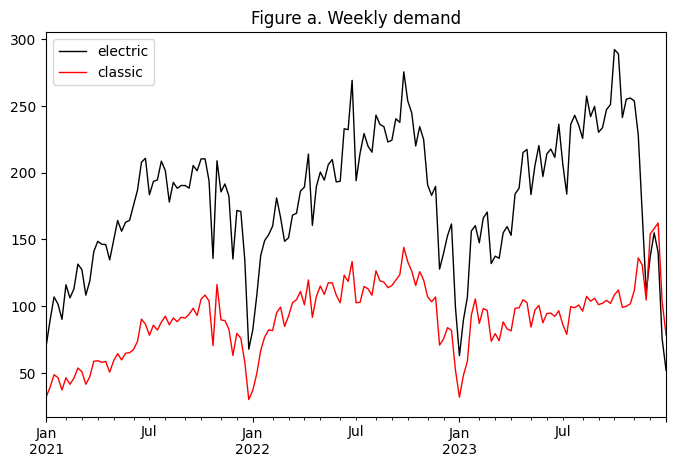

In [ ]:
df['electric'].resample('W').mean().plot(figsize=(8,5), title='Figure a. Weekly demand',
	color='black', linewidth=1, legend=True);
df['classic'].resample('W').mean().plot(figsize=(8,5), title='Figure a. Weekly demand',
	color='red', linewidth=1, legend=True);

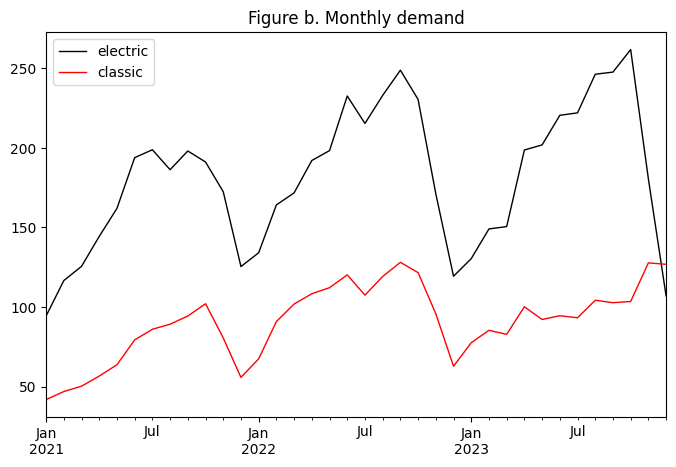

In [ ]:
df['electric'].resample('ME').mean().plot(figsize=(8,5), title='Figure b. Monthly demand',
	color='black', linewidth=1, legend=True);
df['classic'].resample('ME').mean().plot(figsize=(8,5), title='Figure b. Monthly demand',
	color='red', linewidth=1, legend=True);

The **monthly demand chart** shows a clear dominance of electric bikes over classic bikes in terms of average usage. While both bike types exhibit similar seasonal patterns—with peaks in summer and drops in winter—classic bikes tend to lag slightly behind electric bikes in timing and intensity. The consistent gap and slower recovery of classic bikes reinforce the conclusion that they are trailing behind electric bikes in popularity and responsiveness.

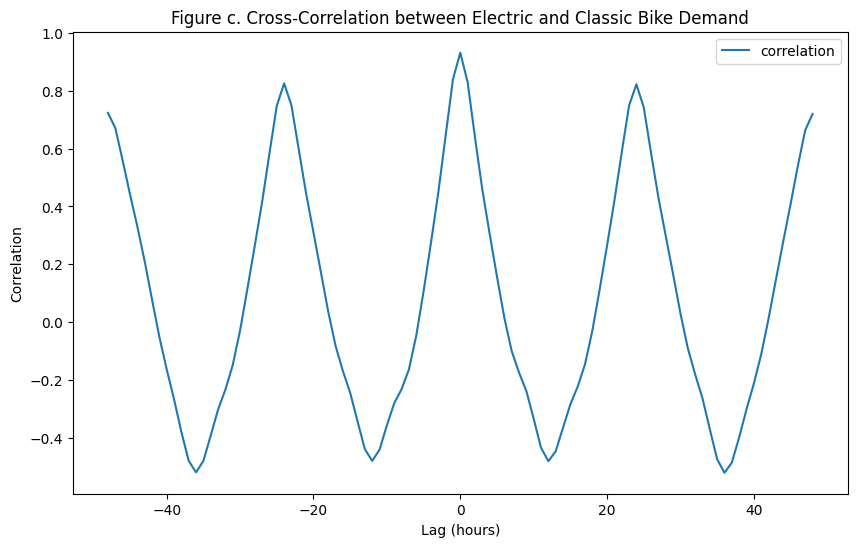

In [ ]:
# Calculate cross-correlation for a range of lags
max_lag = 48 # Checking for up to 48 hours of lag
cross_corr = [df_bike_type['electric'].corr(df_bike_type['classic'].shift(i)) for i in range(-max_lag, max_lag + 1)]

# Create a DataFrame for plotting
cross_corr_df = pd.DataFrame({'lag': range(-max_lag, max_lag + 1), 'correlation': cross_corr})

# Plot the cross-correlation
cross_corr_df.plot(x='lag', y='correlation', kind='line', figsize=(10, 6),
                   title='Figure c. Cross-Correlation between Electric and Classic Bike Demand',
                   xlabel='Lag (hours)', ylabel='Correlation');

The **cross-correlation analysis** shows a strong positive correlation between electric and classic bike demand, peaking near lag = 0. This suggests that both types of bikes follow highly similar demand patterns. However, the correlation remains high slightly after zero lag, indicating that the demand for classic bikes tends to follow the demand for electric bikes with a short delay — supporting the hypothesis that classic bikes are lagging behind.

## Q2. Check for missing station information

In [ ]:
missing_start = rides[rides['start_station_id'].isna()]
missing_end = rides[rides['end_station_id'].isna()]

In [ ]:
print("Start station missing types:\n", missing_start['bike_type'].value_counts())
print("End station missing types:\n", missing_end['bike_type'].value_counts())

Start station missing types:
 bike_type
electric    1180834
Name: count, dtype: int64
End station missing types:
 bike_type
electric    1328264
Name: count, dtype: int64


Conclusion: The information about the start and end stations is missing only for electric bikes.

In [ ]:
rides['dockless'] = rides['start_station_id'].isna() | rides['end_station_id'].isna()
rides['start_time'] = pd.to_datetime(rides['start_time'])

In [ ]:
monthly_stats = rides.set_index('start_time').resample('ME').agg({'dockless': 'sum','bike_type': 'count'})
monthly_stats['dockless_ratio'] = monthly_stats['dockless'] / monthly_stats['bike_type']

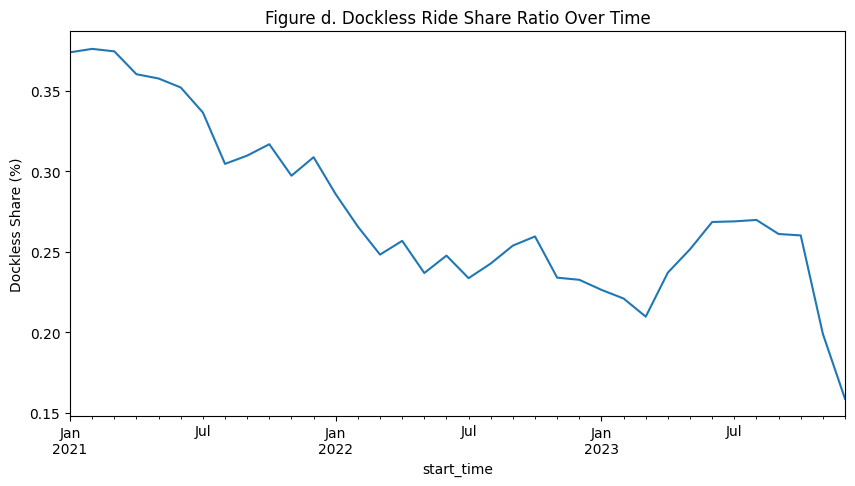

In [ ]:
monthly_stats['dockless_ratio'].plot(figsize=(10,5),
                                     title='Figure d. Dockless Ride Share Ratio Over Time',
                                     xlabel='start_time', ylabel='Dockless Share (%)');

The proportion of dockless rides has steadily declined from approximately 37% in early 2021 to around 15% by the end of 2023. Despite some seasonal fluctuations, the overall trend suggests that dockless bike sharing is not trending upward, but rather becoming less dominant within the Bay Wheels network.

## Q3. Top 10 starting vs ending stations

In [ ]:
# Count top-10 starting stations
top_start = rides['start_station_id'].value_counts().head(10)

# Count top-10 ending stations
top_end = rides['end_station_id'].value_counts().head(10)

In [ ]:
print("Top 10 Starting Stations:\n", top_start)
print("\nTop 10 Ending Stations:\n", top_end)

Top 10 Starting Stations:
 start_station_id
SF-J23-1    79918
SF-E29-2    74548
SF-G27      68196
SF-H26      55822
SF-J29      53284
SF-F28-2    48403
SF-N22-2    47426
SF-E29-1    46027
SF-K29-1    45249
SF-M20      43872
Name: count, dtype: int64

Top 10 Ending Stations:
 end_station_id
SF-J23-1    79146
SF-E29-2    77905
SF-G27      71552
SF-H26      57764
SF-J29      55909
SF-F28-2    51871
SF-N22-2    50859
SF-E29-1    49124
SF-K29-1    46815
SF-O22      46109
Name: count, dtype: int64


In [ ]:
start_set = set(top_start.index)
end_set = set(top_end.index)

overlap = start_set.intersection(end_set)
only_in_start = start_set - end_set
only_in_end = end_set - start_set

In [ ]:
print("Stations in both top-10 lists:", overlap)
print("Only in start list:", only_in_start)
print("Only in end list:", only_in_end)

## Q4. How frequent are circular rides?

In [ ]:
# Step 1: Identify circular rides
rides['is_circular'] = rides['start_station_id'] == rides['end_station_id']

# Step 2: Count total and circular rides
total_rides = len(rides)
circular_rides = rides['is_circular'].sum()

# Step 3: Compute percentage
circular_ratio = circular_rides / total_rides * 100

In [ ]:
print(f"Percentage of circular rides: {circular_ratio:.2f}%")

Percentage of circular rides: 4.51%


Circular rides, where a trip starts and ends at the same station, account for approximately 4.5% of all rides. **This relatively low proportion suggests that most users use the system for point-to-point travel.**

## Q5. Stations with very low activity

In [ ]:
start_counts = rides['start_station_id'].value_counts()
end_counts = rides['end_station_id'].value_counts()

# Combine start and end counts
all_station_counts = start_counts.add(end_counts, fill_value=0).sort_values()

print("Stations with the lowest total activity:")
print(all_station_counts.head(20))

Stations with the lowest total activity:
SF-LW15      6
SF-LW3       7
SF-LW29      8
SF-LW4       8
SF-LW27      9
SF-LW10     10
SF-LW7      11
SF-LW9      12
SF-LW6      12
SF-LW215    14
SF-LW14     16
SF-LW8      22
SF-LW11     23
SF-LW12     24
SF-LW26     24
SF-LW210    27
SF-LW24     35
SF-LW28     35
SF-LW5      37
SF-CC18     40
Name: count, dtype: int64


**Based on the output, the stations listed have very low activity, with some having as few as 6 total rides over the entire period.** These stations could be considered for further investigation or potential removal due to low usage.

## Q6. Seasonal patterns across stations

In [ ]:
# Ensure 'month' column is available
rides['start_time'] = pd.to_datetime(rides['start_time'])
rides['month'] = rides['start_time'].dt.month
rides. head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id,electric,classic,hour,dockless,is_circular,month
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN,True,False,2021-01-01,True,False,1
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29,False,True,2021-01-01,False,False,1
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN,True,False,2021-01-01,True,False,1
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN,True,False,2021-01-01,True,False,1
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN,True,False,2021-01-01,True,False,1


In [ ]:
# Count monthly rides per station
monthly_counts = rides.groupby(['start_station_id', 'month']).size().unstack(fill_value=0)
monthly_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, BK-A3 to Sf-Z17
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       576 non-null    int64
 1   2       576 non-null    int64
 2   3       576 non-null    int64
 3   4       576 non-null    int64
 4   5       576 non-null    int64
 5   6       576 non-null    int64
 6   7       576 non-null    int64
 7   8       576 non-null    int64
 8   9       576 non-null    int64
 9   10      576 non-null    int64
 10  11      576 non-null    int64
 11  12      576 non-null    int64
dtypes: int64(12)
memory usage: 58.5+ KB


In [ ]:
# Compute standard deviation and CV
monthly_counts['std'] = monthly_counts.std(axis=1)
monthly_counts['mean'] = monthly_counts.mean(axis=1)
monthly_counts['cv'] = monthly_counts['std'] / monthly_counts['mean']

print(monthly_counts[['std', 'mean', 'cv']].head())

month                    std        mean        cv
start_station_id                                  
BK-A3              62.158644  270.319896  0.229945
BK-A7              80.449118  350.188394  0.229731
BK-B7              45.934406  227.687262  0.201743
BK-B9             124.724029  451.209541  0.276422
BK-C1              35.583023  176.121771  0.202036


In [ ]:
# Top seasonal stations
most_seasonal = monthly_counts.sort_values(by='cv', ascending=False).head(20)
max_cv = monthly_counts['cv'].max()
top_seasonal_stations = monthly_counts[monthly_counts['cv'] == max_cv]

display(top_seasonal_stations[['std', 'mean', 'cv']])

month,std,mean,cv
start_station_id,,,
SF-B20,50.229473,17.248421,2.91212
SF-LW1,6.062178,2.081706,2.91212
SF-LW14,2.309401,0.793031,2.91212
SF-LW15,0.866025,0.297387,2.91212
SF-LW3,0.866025,0.297387,2.91212
SF-LW4,1.154701,0.396515,2.91212
SF-LW6,1.732051,0.594773,2.91212
SF-LW8,3.464102,1.189546,2.91212
SF-LW9,1.732051,0.594773,2.91212


**A total of 9 stations exhibited the highest level of seasonal variability, each with a CV of 2.91212.**
These stations likely serve highly seasonal or event-driven travel demand. Their usage patterns show clear monthly peaks and troughs, highlighting the importance of flexible, demand-sensitive resource allocation.